# 卷积运算
$$s(t) = \int x(a)w(t - a)\mathrm da = (x * w)(t) = \sum_{a = -\infty}^\infty x(a)w(t - a)$$
在卷积网络的术语中，卷积的第一个参数（在这个例子中，函数$x$）通常叫做输入，第二个参数（函数$w$）叫做核函数
$$S(i, j) = (K * I)(i, j) = \sum_m\sum_nI(m, n)K(i - m, j - n) = (I * K)(i, j) = \sum_m\sum_nI(i - m, j - n)K(m, n)$$
卷积运算可交换性的出现是因为我们将核相对输入进行了翻转，从$m$增大的角度来看，输入的索引在增大，但是核的索引在减小。许多神经网络库会实现一个相关的函数，称为互相关函数，和卷积运算几乎一样但是并没有对核进行翻转：$S(i, j) = (I * K)(i, j) = \sum_m\sum_nI(i + m, j + n)K(m, n)$

离散卷积可以看作矩阵的乘法，然而，这个矩阵的一些元素被限制为必须和另外一些元素相等。例如对于单变量的离散卷积，矩阵每一行中的元素都与上一行对应位置平移一个单位的元素相同。这种矩阵叫做**Toeplitz**矩阵。对于二维情况，卷积对应着一个**双重分块循环矩阵**。除了这些元素相等的限制以外，卷积通常对应着一个非常稀疏的矩阵（一个几乎所有元素都为零的矩阵）。这是因为核的大小通常要远小于输入图像的大小

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_sample_images


images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)
images.shape

TensorShape([2, 70, 120, 3])

In [2]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 64, 114, 32])

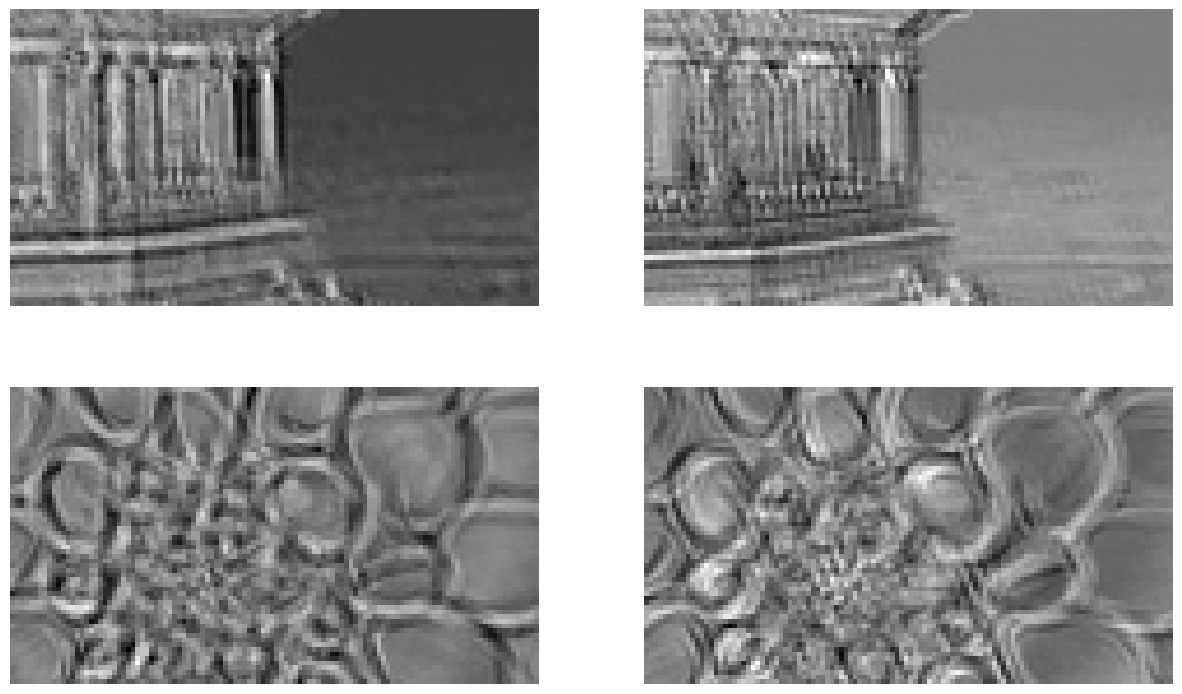

In [3]:
# extra code – displays the two output feature maps for each image

plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In [4]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

In [5]:
# extra code – this utility function can be useful to compute the size of the
#              feature maps output by a convolutional layer. It also returns
#              the number of ignored rows or columns if padding="valid", or the
#              number of zero-padded rows or columns if padding="same"."""

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded


conv_output_size(np.array([70, 120]), kernel_size=7, strides=2, padding="same")

(array([35, 60]), array([5, 5]))

In [6]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [7]:
biases.shape

(32,)

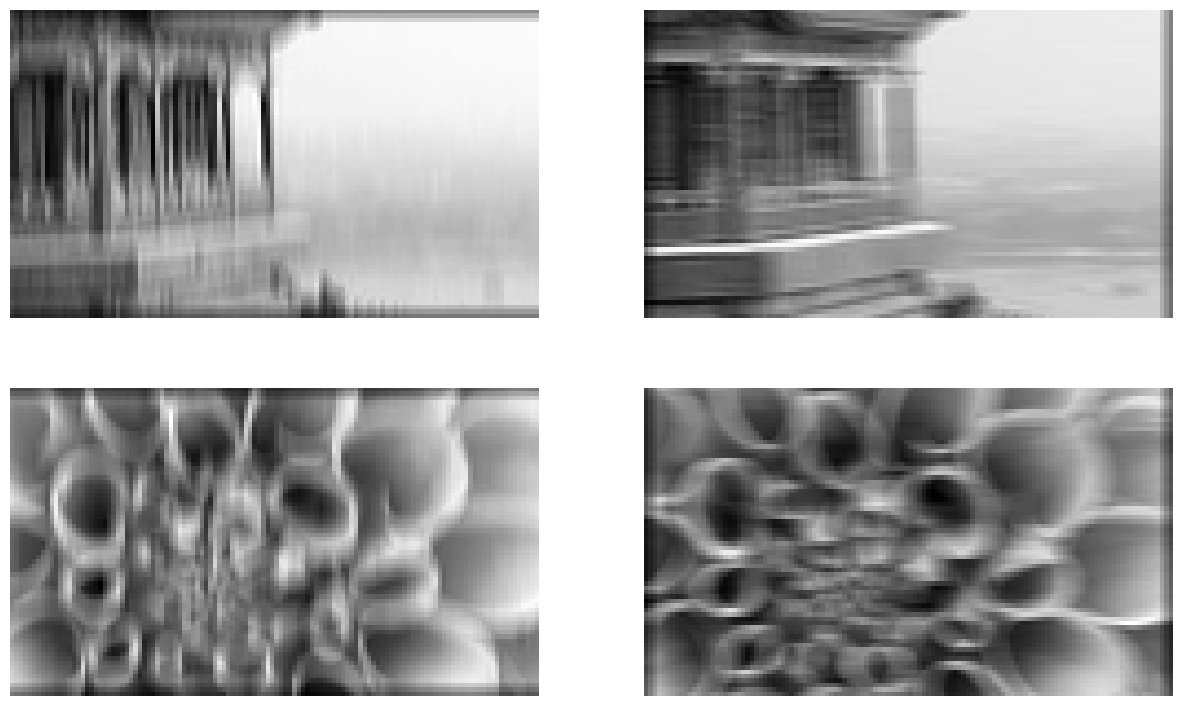

In [8]:
# extra code – shows how to use the tf.nn.conv2d() operation

tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

# extra code – shows how to manually create two filters to get images similar
#              to those in Figure 14–5.

plt.figure(figsize=(15, 9))
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

[返回](cnn.md)